*Task 3.1*

In [ ]:
import numpy
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 

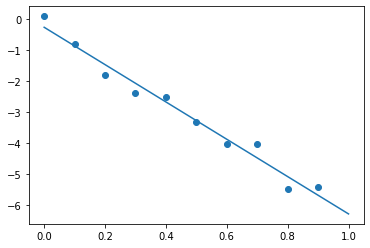

array([[-3.14442237]])

In [ ]:
yValues= numpy.load("y_values.npy")
xValues=numpy.load("x_values.npy")
xTest=numpy.load("test_x_values.npy")
reg=LinearRegression().fit(xValues, yValues)
predictedY=reg.predict(xTest)
plt.figure()
plt.scatter(xValues, yValues)
plt.plot(xTest,predictedY)
plt.show() 
n=numpy.array([0.48])
n=numpy.reshape(n,(1,1))
reg.predict(n)

*Task 3.2*

(178, 13)


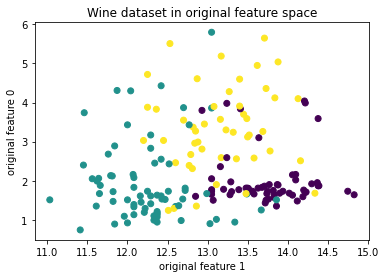

In [ ]:
wineData=numpy.load("wineData.npy")
wineLabels=numpy.load("wineLabels.npy")
print(numpy.shape(wineData))
plt.figure()
plt.scatter(wineData[:,0], wineData[:,1], c=wineLabels)
plt.xlabel('original feature 1')
plt.ylabel('original feature 0')
plt.title('Wine dataset in original feature space')
plt.show() 


This data has 13 features and 178 samples with a 2d visualisation it is difficult to find clusters in attributes.

In [ ]:
train_data=wineData[0:142]
test_data=wineData[142:]
train_labels=wineLabels[0:142]
test_labels=wineLabels[142:]

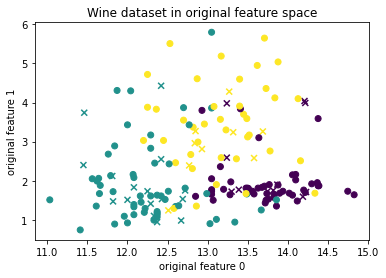

In [ ]:
plt.figure()
plt.scatter(test_data[:,0], test_data[:,1], c=test_labels, marker='x')
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels)
plt.xlabel('original feature 0')
plt.ylabel('original feature 1')
plt.title('Wine dataset in original feature space')
plt.show() 

In [ ]:
pca = PCA(n_components=2)
pca.fit(train_data)

PCA(n_components=2)

In [ ]:
t_train_data=pca.fit_transform(train_data)
t_test_data=pca.fit_transform(test_data)

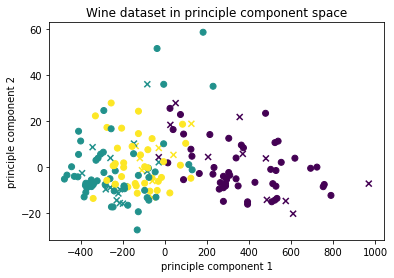

In [ ]:
plt.figure()
plt.scatter(t_test_data[:,0], t_test_data[:,1], c=test_labels, marker='x')
plt.scatter(t_train_data[:,0], t_train_data[:,1], c=train_labels)
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('Wine dataset in principle component space')
plt.show() 

*Task 3.3*

In [ ]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(train_data,train_labels)
lda_train_data=lda.fit_transform(train_data, train_labels)
lda_test_data=lda.fit_transform(test_data, test_labels)

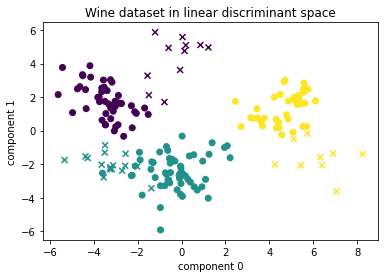

In [ ]:
plt.figure()
plt.scatter(lda_test_data[:,0], lda_test_data[:,1], c=test_labels, marker='x')
plt.scatter(lda_train_data[:,0], lda_train_data[:,1], c=train_labels)
plt.xlabel('component 0')
plt.ylabel('component 1')
plt.title('Wine dataset in linear discriminant space')
plt.show() 

seperation between catagories is much more clear in LDA than PCA this is because PCA is used to demonatate variation in data. LDA attemps to show differences in groups.

*3.4*

In [ ]:
meanVector = []
rows, cols = numpy.shape(train_data)
mcTrainData = numpy.empty([rows, cols], dtype=float)
for i in range(cols):

    meanVector.append(train_data[:,i].mean())
    mcTrainData[:,i] = train_data[:,i] - train_data[:,i].mean()

print(numpy.shape(mcTrainData))

(142, 13)


In [ ]:
normalMcTrainData = numpy.empty([rows, cols], dtype=float)

normalMcTrainData = mcTrainData / mcTrainData.std()

print(numpy.shape(normalMcTrainData))
print(normalMcTrainData.mean())

(142, 13)
2.3094563459158186e-17


In [ ]:
u, s, vh = numpy.linalg.svd(normalMcTrainData)
sorted_vh = numpy.sort(vh)
#reverse_vh = sorted_vh[::-1]
reverse_vh = vh[0:2]
projected_train_data = normalMcTrainData @ numpy.transpose(reverse_vh)
numpy.shape(projected_train_data)

(142, 2)

but why do we need the trans-
pose? \
Because A=USV^T so v transpose is relational to A not just V \
How can we tell that our dimensionality has been reduced?\
numpy.shape shows our data is not 142,2 instead of 142,13

In [ ]:
rows, cols = numpy.shape(test_data)
mcTestData = numpy.empty([rows, cols], dtype=float)
for i in range(cols):
    mcTestData[:,i] = test_data[:,i] - test_data[:,i].mean()



In [ ]:
normalMcTestData = mcTestData / mcTrainData.std()
print(numpy.shape(normalMcTestData))

(36, 13)


In [ ]:
projected_test_data = normalMcTestData @ numpy.transpose(reverse_vh)
numpy.shape(projected_test_data)

(36, 2)

using the mean vector from the training data (why?), use the same projection matrix
from before (why?). \
you wan't to check how your model performs on unseen data not data already included. \


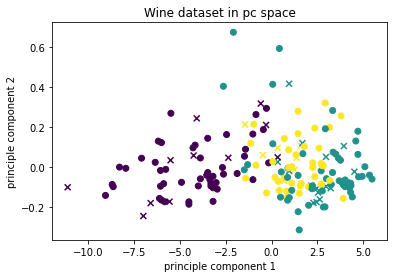

In [ ]:
plt.figure()
plt.scatter(projected_test_data[:,0], projected_test_data[:,1], c=test_labels, marker='x')
plt.scatter(projected_train_data[:,0], projected_train_data[:,1], c=train_labels)
plt.xlabel('principle component 1')
plt.ylabel('principle component 2')
plt.title('Wine dataset in pc space')
plt.show() 

*3.5*

In [ ]:
meanVector = []
data5=numpy.load("task3_5_data.npy")
rows, cols = numpy.shape(data5)
mcData = numpy.empty([rows, cols], dtype=float)
for i in range(cols):

    meanVector.append(data5[:,i].mean())
    mcData[:,i] = data5[:,i] - data5[:,i].mean()

print(numpy.shape(mcData))

(60000, 784)


In [ ]:
normalMcData = numpy.empty([rows, cols], dtype=float)
normalMcData = mcData / mcData.std()
covarienceMatrix=numpy.dot(numpy.transpose(normalMcData), normalMcData)



In [ ]:
eigenvalues, eigenvectors = numpy.linalg.eig(covarienceMatrix)
numpy.shape(eigenvalues)

(784,)

In [44]:
pcVariations=eigenvalues/(60000-1)
pcVariations.sort()
sortedVariations = pcVariations[::-1]


totalVariation = numpy.sum(sortedVariations)
percentVariation = sortedVariations/totalVariation

total=0
count=0
while total<0.9:
  count=count+1
  total=total+percentVariation[count]
  count=count+1

count


87